## Setup the notebook

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import json

## Questions and Methodology:

#### The approach considered in this notebook could be resumed as follow:
- I downloaded earthquake events data for the whole south american region in the last 100 years. The data contained magnitude and location of the epicenter of the earthquake. 
- We need a measure to estimate the pga in a specific location (our clients location). I downloaded from the pga shakemaps the file "Station List" containing - for every earthquake - the pga measured at different stations close to the earthquake 
- Unfortunately for several earthquake I realised the "Station List" data was empty, and I couldn't find a way to download all files for all earthquakes in one shot.
- For this reason, I used only the largest earthquake in the database to estimate a functional dependency of the form pga = C1 X Magnitude X Exp(- C2 X Distance), as could be justified by some scientific literature
- Using such formula, I estimated for each eartquake in our dataset, the pga that could been felt at the location of our client.
- **This estimated pga is likely to be a low estimate**, because it seems that:
  - The exponential fit underestimate pga at low distance from epicenter
  - There is a large variance in the pga measured across different stations (different type of soil, other physical reasons..)
- Sticking to this simple exponential estimate, we count the number of events over the long 100 years period with a large pga in order to reply to the questions.

#### This is our final result for the number of relevant events (see the rest of the notebook), and will be used to reply to the questions

In [2]:
print('earthquake events with pga > 15%g in 100years =', 
      39)
print('earthquake events with pga > 20%g in 100years =', 
      10)
print('earthquake events with pga > 25%g in 100years =', 
      1)
print('earthquake events with pga > 30%g in 100years =', 
      0)
print('earthquake events with pga > 35%g in 100years =', 
      0)

earthquake events with pga > 15%g in 100years = 39
earthquake events with pga > 20%g in 100years = 10
earthquake events with pga > 25%g in 100years = 1
earthquake events with pga > 30%g in 100years = 0
earthquake events with pga > 35%g in 100years = 0


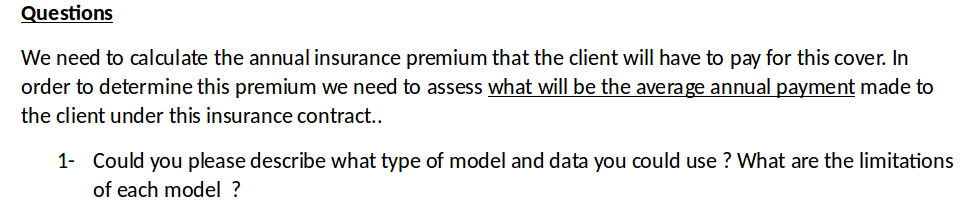

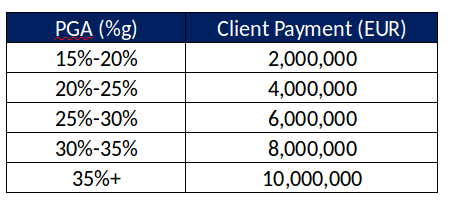

#### Question 1

#### Above I described the approach used in this notebook to compute the number of earthquake events in the area. We could suggest different improvements to this approach:
- Find better data for pga
- Better understanding the reason of the fluctuations of the pga as a function of the distance (how it depends on soil or other paramenters)
- Study earthquake spatial correlations to estimate the probability to have an earthquake even closer to the client site that the ones observed in the past
- Study earthquake temporal correlations to estimate probability to have a higher number of earthquake in the same time period

#### Question 2

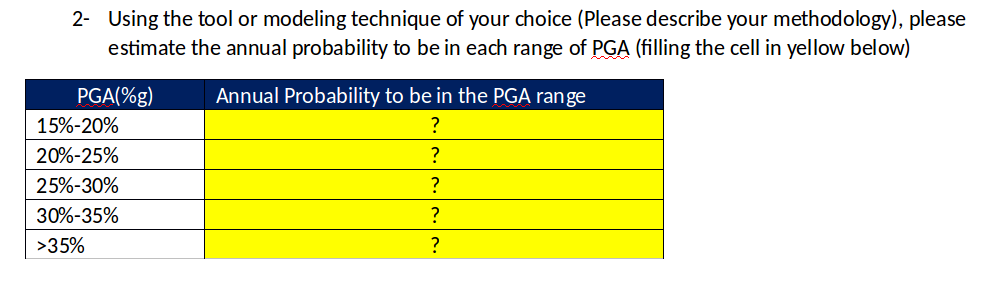

#### By the total number of counts, we can quickly compute the average number of events we expect per year

In [3]:
print('Average yearly number of events in 15%g-20%g =', 
      0.28)
print('Average yearly number of events in 20%g-25%g  =', 
      0.09)
print('Average yearly number of events in 25%g-30%g  =', 
      0.01)
print('Average yearly number of events in 30%g-35%g  =', 
      0)
print('Average yearly number of events in >35%g%  =', 
      0)

Average yearly number of events in 15%g-20%g = 0.28
Average yearly number of events in 20%g-25%g  = 0.09
Average yearly number of events in 25%g-30%g  = 0.01
Average yearly number of events in 30%g-35%g  = 0
Average yearly number of events in >35%g%  = 0


#### Considering the events as independent phenomena, we can interpret the previous non-zero averages as the average values of 3 different Posson processes

In [4]:
def poisson_1(lambd_):
    return (lambd_*np.exp(-lambd_))

In [5]:
print('Annual probability to have exactly one event in 15%g-20%g =', 
      poisson_1(0.28),'%')
print('Annual probability to have exactly one event in 20%g-25%g  =', 
      poisson_1(0.09),'%')
print('Annual probability to have exactly one event in 25%g-30%g  =', 
      poisson_1(0.01),'%')

Annual probability to have exactly one event in 15%g-20%g = 0.21161944760760315 %
Annual probability to have exactly one event in 20%g-25%g  = 0.08225380667441054 %
Annual probability to have exactly one event in 25%g-30%g  = 0.009900498337491681 %


In [6]:
def poisson_morethan0(lambd_):
    return (1.-np.exp(-lambd_))

In [7]:
print('Annual probability to have at least one event in 15%g-20%g =', 
      poisson_morethan0(0.28),'%')
print('Annual probability to have at least one event in 20%g-25%g  =', 
      poisson_morethan0(0.09),'%')
print('Annual probability to have at least one event in 25%g-30%g  =', 
      poisson_morethan0(0.01),'%')

Annual probability to have at least one event in 15%g-20%g = 0.24421625854427453 %
Annual probability to have at least one event in 20%g-25%g  = 0.08606881472877181 %
Annual probability to have at least one event in 25%g-30%g  = 0.009950166250831893 %


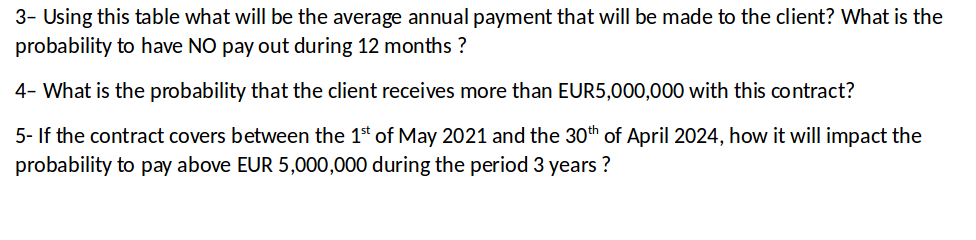

#### Question 3


In [8]:
av15_20=0.28
av20_25=0.09
av25_30=0.01
Average_annual_payment = 2 * (av15_20) + 4 * (av20_25) + 6 * (av25_30)
print ('Average annual payment = ',Average_annual_payment,'M$')                    

Average annual payment =  0.98 M$


#### The averages measured can be directly used to computed the average annual payment

In [10]:
av15_=0.39
Prob_no_earthquake = np.exp(-av15_)
print ('Probability no payout = ',Prob_no_earthquake,'%')                    

Probability no payout =  0.6770568744981647 %


#### The probability to not have a single earthquake > 15%g can be computed as follow:
- the average probability of having earthquake >15%g is 39%
- we use this as the average of a Poisson distribution and we compute P(k=0, lambda=0.39)

#### Question 4:

In [11]:
av15_20=0.28
av20_25=0.09
av25_30=0.01
P0_25 = np.exp(-av25_30)
P1_20 = np.exp(-av20_25) + np.exp(-av20_25)*av20_25
P2_15 = np.exp(-av15_20) + np.exp(-av15_20)*av15_20 + np.exp(-av15_20)*(av15_20**2.)/2.
Pmore5Mil = 1. - (P0_25*P1_20*P2_15)
print ('Probability to pay more than 5M$ = ',100*Pmore5Mil,'%')                    

Probability to pay more than 5M$ =  1.6656531574095634 %


#### I proceded as follows:
- I computed the probability to pay < 5 M as the product of:
  - having 0 earthquake >25
  - having max 1 earthquake >20
  - having max 2 earthquake >15
- The probability to pay > 5 M is just 1 minus the previous probability

#### Question 4:
Probability to pay > 5Mil over a 3 year period

In [12]:
av15_20=0.28*3
av20_25=0.09*3
av25_30=0.01*3
P0_25 = np.exp(-av25_30)
P1_20 = np.exp(-av20_25) + np.exp(-av20_25)*av20_25
P2_15 = np.exp(-av15_20) + np.exp(-av15_20)*av15_20 + np.exp(-av15_20)*(av15_20**2.)/2.
Pmore5Mil = 1. - (P0_25*P1_20*P2_15)
print ('Probability to pay more than 5M$ in 3 years= ',100*Pmore5Mil,'%')  

Probability to pay more than 5M$ in 3 years=  10.935007818073528 %


#### Over a 3 year period the difference is that the averages of the Posson distribution are multiplied by 3

## 1. Get and explore data earthquake events data

#### Performed a query for the 10years before the 1st of May 2021 on the whole south american region

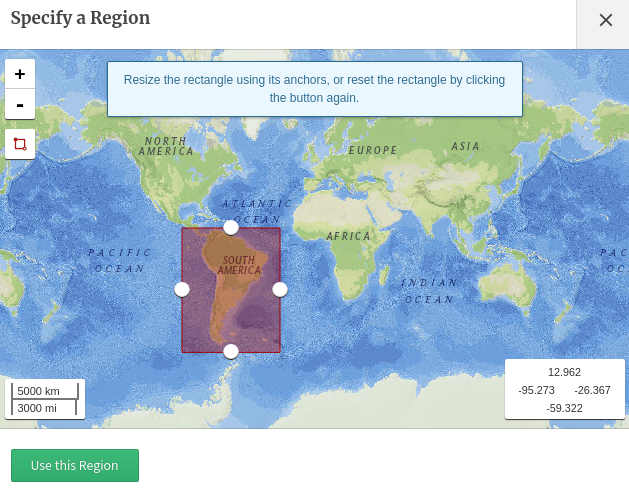

In [13]:
df_10 = pd.read_csv('query.csv')

In [14]:
df_10.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

In [15]:
df_10.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,667.000000,667.000000,667.000000,667.000000,74.000000,650.000000,576.000000,658.000000,485.000000,610.000000,342.000000,345.00000
mean,-19.642863,-68.797726,59.846807,5.765067,404.554054,51.746769,2.541729,0.934787,6.389897,2.554918,0.058281,52.22029
std,19.101808,15.255870,99.698305,0.558763,191.280268,31.561681,2.845671,0.213009,1.990463,1.305232,0.023196,64.69484
min,-59.307400,-95.235200,1.320000,4.000000,16.000000,10.000000,0.010000,0.390000,1.200000,1.000000,0.024000,3.00000
25%,-31.609000,-76.130200,10.000000,5.500000,277.000000,29.000000,0.656750,0.790000,5.000000,1.800000,0.044000,24.00000
50%,-20.642600,-71.580300,22.260000,5.600000,420.500000,43.000000,1.458500,0.910000,6.200000,1.850000,0.053000,37.00000
75%,-1.940450,-68.718000,72.000000,6.000000,527.250000,69.000000,3.389250,1.060000,7.700000,3.200000,0.066750,55.00000
max,12.918700,-26.385600,630.000000,8.300000,934.000000,197.000000,15.895000,1.680000,12.000000,14.100000,0.245000,525.00000


In [16]:
df_10_geo = gpd.read_file('query.geojson')

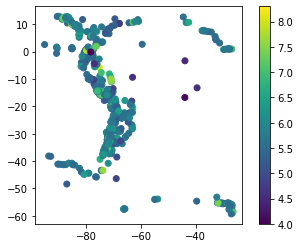

In [17]:
fig, ax = plt.subplots(1, 1)

df_10_geo.plot(column='mag', ax=ax, legend=True);

#### This data contains Magnitude, location of the epicenter of the earthquakes, but no information on pga

## 2. Get pga as function of magnitude and distance

#### I couldn't find a better way to obtain pga data for a given location that the following:
- get pga maps for some of the largest earthquake in the region of interest
- Fit a functional dependence on how pga depends on both magnitude and distance.

### I select a smaller regior around Valparaiso, looked at the largest earthquakes

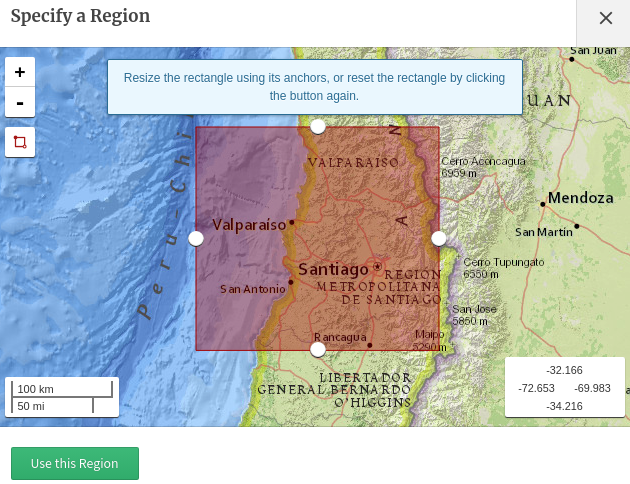

In [18]:
list_data1 = json.load(open('shakemap-1st.json'))['features'] #1st largest earthquaque Valparaiso 1985 M 8
list_data2 = json.load(open('shakemap-2nd.json'))['features'] #2nd largest earthquaque Valparaiso 1971 M 7.8

In [19]:
print(len(list_data1),len(list_data2)) #51 observations for the 1st largest earthquake, 22 obs for the 2nd largest

51 22


In [20]:
# locating null values
for i in range(len(list_data1)): 
    pga_value=list_data1[i]['properties']['pga']
    if (pga_value=='null'): print('null value in list_data1 at', i)
for i in range(len(list_data2)): 
    pga_value=list_data1[i]['properties']['pga']
    if (pga_value=='null'): print('null value in list_data2 at', i)

null value in list_data1 at 10
null value in list_data2 at 10


In [21]:
#removing null values
del list_data1[10]
del list_data2[10]

In [22]:
# creating dataframes with pga and distances
df_reg1=pd.DataFrame(index=range(50), columns=['pga','distance'])
df_reg2=pd.DataFrame(index=range(21), columns=['pga','distance'])

pga=list(range(50))
dist=list(range(50))
for i in range(50):
    pga[i]=float(list_data1[i]['properties']['pga'])
    dist[i]= list_data1[i]['properties']['distance']
df_reg1['pga']=pga
df_reg1['distance']=dist

pga=list(range(21))
dist=list(range(21))
for i in range(21):
    pga[i]=float(list_data2[i]['properties']['pga'])
    dist[i]= list_data2[i]['properties']['distance']
df_reg2['pga']=pga
df_reg2['distance']=dist

In [23]:
# fit an exponential model on the largest earthquake
x_data = np.array(df_reg1.sort_values(by=['distance']).distance)
y_data = np.array(df_reg1.sort_values(by=['distance']).pga)

log_y_data = np.log(y_data)
log_y_data_M = np.log(y_data/8)


curve_fit = np.polyfit(x_data, log_y_data_M, 1)
print(curve_fit)

[-0.00917812  1.56654779]


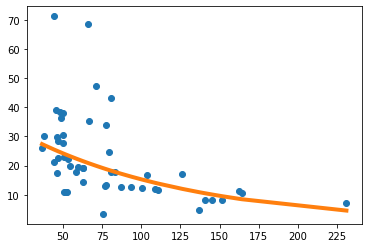

In [25]:
y = 8*np.exp(1.56654779) * np.exp(-0.00917812*x_data)
plt.plot(x_data, y_data, "o");
plt.plot(x_data, y,linewidth=4);

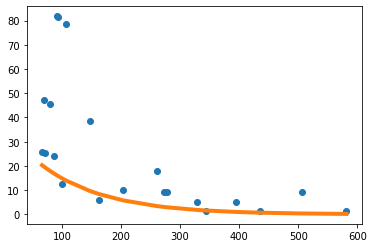

In [27]:
# qualitative check, the fit generalise to the 2nd earthquake
x_data = np.array(df_reg2.sort_values(by=['distance']).distance)
y_data = np.array(df_reg2.sort_values(by=['distance']).pga)

log_x_data = np.log(x_data)
log_y_data = np.log(y_data)

y = 7.8 * np.exp(1.56654779) * np.exp(-0.009178*x_data)
plt.plot(x_data, y_data, "o");
plt.plot(x_data, y,linewidth=4);

#### The fit never goes above 35% g while I have obseravtions in certain station above 80%g

#### Two problems: 
- Exponential fit pga ~ Magnitude Exp(- B distance) is underestimating high values of pga at low distances 
- Can't  get pga data for several large eartquakes in the area to average over large values of eartquakes

#### Json files of the shakemap for the 3rd largest eartquake in Valparaiso area. 

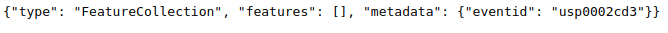

## 3. Create "expected pga" data in client location for 100 years of data

In [28]:
df_100 = pd.read_csv('query_100years.csv')

In [29]:
df_100.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

In [30]:
# compute distance of each earthquake from our client
import geopy.distance
coords_client = (-32.936,-71.156)
def distance_client(coords_):
    return geopy.distance.distance(coords_, coords_client).km
coords_points= df_100[['longitude','latitude']]
df_100['coords'] = list(zip(df_100.latitude, df_100.longitude))
df_100['distance_client'] = df_100['coords'].apply(distance_client)

In [31]:
# compute pga of each earthquake perceived by our client
df_100['pga_exp_fit'] = df_100['mag'] * np.exp(1.56654779) * \
                        np.exp(-0.009178*df_100['distance_client'])


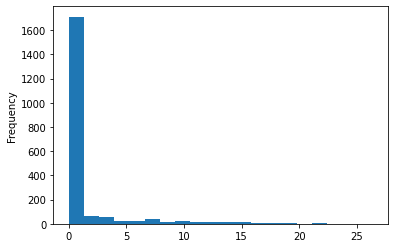

In [32]:
df_100['pga_exp_fit'].plot.hist(bins=20);

In [33]:
print('earthquake events with pga > 15%g in 100years =', 
      df_100['pga_exp_fit'].where(df_100['pga_exp_fit']>15).count())
print('earthquake events with pga > 20%g in 100years =', 
      df_100['pga_exp_fit'].where(df_100['pga_exp_fit']>20).count())
print('earthquake events with pga > 25%g in 100years =', 
      df_100['pga_exp_fit'].where(df_100['pga_exp_fit']>25).count())
print('earthquake events with pga > 30%g in 100years =', 
      df_100['pga_exp_fit'].where(df_100['pga_exp_fit']>30).count())
print('earthquake events with pga > 35%g in 100years =', 
      df_100['pga_exp_fit'].where(df_100['pga_exp_fit']>35).count())

earthquake events with pga > 15%g in 100years = 39
earthquake events with pga > 20%g in 100years = 10
earthquake events with pga > 25%g in 100years = 1
earthquake events with pga > 30%g in 100years = 0
earthquake events with pga > 35%g in 100years = 0


#### These numbers are quite small, it's strongly dependent on our data quality for how we measure pga at our client location